ST 2195 Qn 3

# How does the number of people flying between different locations change over time?

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df2006 = pd.read_csv('2006.csv')

In [3]:
df2007 = pd.read_csv('2007.csv')

In [4]:
dfairport = pd.read_csv('airports.csv')

## Data Wrangling 

We will reduce the columns in the df2006 and df2007 to keep only those that are needed. We will also only keep columns that are needed for dfairport.

In [5]:
table2006 = df2006[['Year','Month','Origin','Dest']]

In [6]:
table2007 = df2007[['Year','Month','Origin','Dest']]

In [7]:
tableairport = dfairport[['iata','airport']]

Now we merge the table2006 with tableairport and table2007 with tableairport. Before doing so we need to rename the column 'iata' to 'Origin' so that they will have a common column to merge the data. Then we merge the data with tableairport1. 

In [8]:
tableairport1 = tableairport.rename(columns={'iata':'Origin'})

In [9]:
airport2006 = pd.merge(table2006,tableairport1)

In [10]:
airport2007 = pd.merge(table2007,tableairport1)

## Busiest Airport 

In this section we want to find the busiest airport in terms of the frequency of flights departing from the airport. After finding the busiest airport, we want to find the top 4 destination. We will be plotting for both years seperately but we want the top4 destination to be the same for a fair comparison. Thus, we combine the airport2006 and airport2007. 

In [11]:
Combinedairport = pd.concat([airport2006,airport2007])

After combining the data we find the busiest airport. We use the code below. .groupby is used to group the airport with same iata under the column 'Origin'. .count is the function which is to sum up the common iata. .sort_values is to arrange the values by the column 'Month' which is mention inside the brackets with by='Month'. We ascending as False so the values will be arranged in descending values. We use .head() to find the busiest airport. Inside the bracket we put as 5 to show 5 most busiest flights interm os frequency of flight departed.

In [12]:
Countairport = Combinedairport.groupby('Origin').count().sort_values(by='Month', ascending=False)

In [13]:
Countairport.head(5)

,Year,Month,Dest,airport
Origin,,,,
ATL,821822,821822,821822,821822
ORD,749520,749520,749520,749520
DFW,598508,598508,598508,598508
DEN,473404,473404,473404,473404
LAX,471385,471385,471385,471385


We found that ATL is the busiest airport. Now we only select rows that has 'ATL' in the column 'Origin'. After which we do the same as above to find the busiest now we groupby in the column 'Dest'. We only want the top thus we put '4' in .head().

In [14]:
ATLdest = Combinedairport.loc[Combinedairport['Origin'] == 'ATL']

In [15]:
ATLdestcount = ATLdest.groupby('Dest').count().sort_values(by='Month', ascending=False)

In [16]:
ATLdestcount.head(4)

,Year,Month,Origin,airport
Dest,,,,
LGA,20694,20694,20694,20694
DFW,19607,19607,19607,19607
MCO,18174,18174,18174,18174
EWR,16278,16278,16278,16278


## Data For Plotting

Now we manipulate the data for plotting and we will not use the combined data but the data for two seperate years. First we use df.loc to only keep the value 'ATL' in the column 'Origin'. Now we do groupby to group them by months. .agg('count') is under pandas. .agg means aggregate size 'count' is what we want the sum for each month. we use .reset_index so that both column 'Month' and 'airport'(which is the count) will be presented as two columns instead of a pivot table (default). It has to be two columns so that we will be able to plot the graph later. we want to reset 'Month' into a column. Both years will use the same codes with different data years. This will repeated for all 4 destination. 

### 2006 

In [17]:
airport2006_ATL = airport2006.loc[airport2006['Origin'] == 'ATL']

In [18]:
ATL_LGA2006 = airport2006_ATL.loc[airport2006_ATL['Dest'] == 'LGA']

In [19]:
dfATL_LGA2006 = ATL_LGA2006.groupby('Month')['airport'].agg('count').reset_index('Month')

In [20]:
ATL_DFW2006 = airport2006_ATL.loc[airport2006_ATL['Dest'] == 'DFW']

In [21]:
dfATL_DFW2006 = ATL_DFW2006.groupby('Month')['airport'].agg('count').reset_index('Month')

In [22]:
ATL_MCO2006 = airport2006_ATL.loc[airport2006_ATL['Dest'] == 'MCO']

In [23]:
dfATL_MCO2006 = ATL_MCO2006.groupby('Month')['airport'].agg('count').reset_index('Month')

In [24]:
ATL_EWR2006 = airport2006_ATL.loc[airport2006_ATL['Dest'] == 'EWR']

In [25]:
dfATL_EWR2006 = ATL_EWR2006.groupby('Month')['airport'].agg('count').reset_index('Month')

### 2007 

In [26]:
airport2007_ATL = airport2007.loc[airport2007['Origin'] == 'ATL']

In [27]:
ATL_LGA2007 = airport2007_ATL.loc[airport2007_ATL['Dest'] == 'LGA']

In [28]:
dfATL_LGA2007 = ATL_LGA2007.groupby('Month')['airport'].agg('count').reset_index('Month')

In [29]:
ATL_DFW2007 = airport2007_ATL.loc[airport2007_ATL['Dest'] == 'DFW']

In [30]:
dfATL_DFW2007 = ATL_DFW2007.groupby('Month')['airport'].agg('count').reset_index('Month')

In [31]:
ATL_MCO2007 = airport2007_ATL.loc[airport2007_ATL['Dest'] == 'MCO']

In [32]:
dfATL_MCO2007 = ATL_MCO2007.groupby('Month')['airport'].agg('count').reset_index('Month')

In [33]:
ATL_EWR2007 = airport2007_ATL.loc[airport2007_ATL['Dest'] == 'EWR']

In [34]:
dfATL_EWR2007 = ATL_EWR2007.groupby('Month')['airport'].agg('count').reset_index('Month')

## Plotting 

We will be using line plot for this analysis. We plot multiple subplots together. I will show two years data in two multiple subplots. One year will show all four destination in multiple subplots. To code the placement we do ax[0/1][0/1]. The first square bracket is if for whether the graph will be shown at the top (0) or bottom (1). The second square bracket is whether it placed at left (0) or right (1).

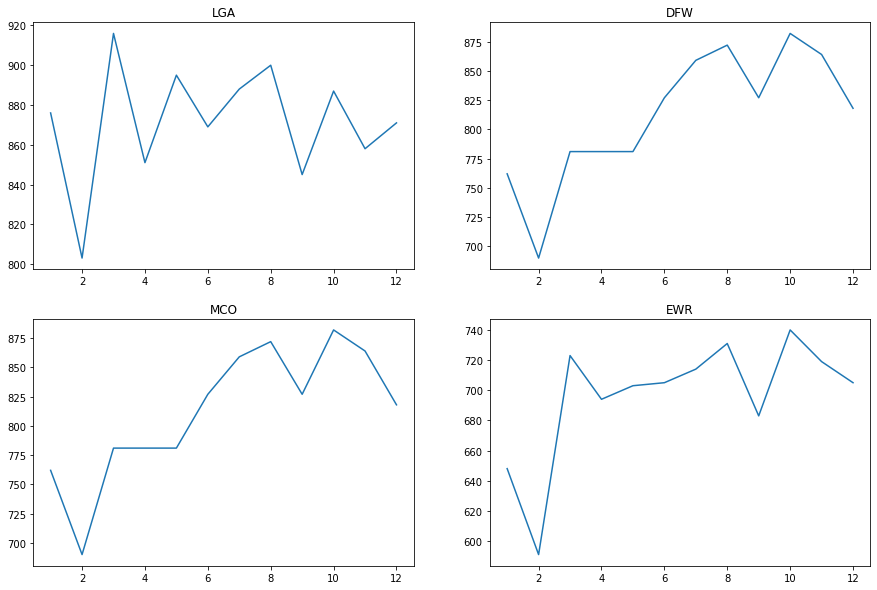

In [35]:
fig, ax = plot.subplots(2, 2, figsize = (15,10))                      # ax has an array (2,2)
                                                                      # the figure will be 15 inch x 11 inch

ax[0][0].plot(dfATL_LGA2006['Month'], dfATL_LGA2006['airport'])       # Top Left
ax[0][0].title.set_text('LGA')

ax[0][1].plot(dfATL_DFW2006['Month'], dfATL_DFW2006['airport'])       # Top Right
ax[0][1].title.set_text('DFW')

ax[1][0].plot(dfATL_MCO2006['Month'], dfATL_DFW2006['airport'])       # Bottom Left
ax[1][0].title.set_text('MCO')

ax[1][1].plot(dfATL_EWR2006['Month'], dfATL_EWR2006['airport'])       # Bottom Right
ax[1][1].title.set_text('EWR')

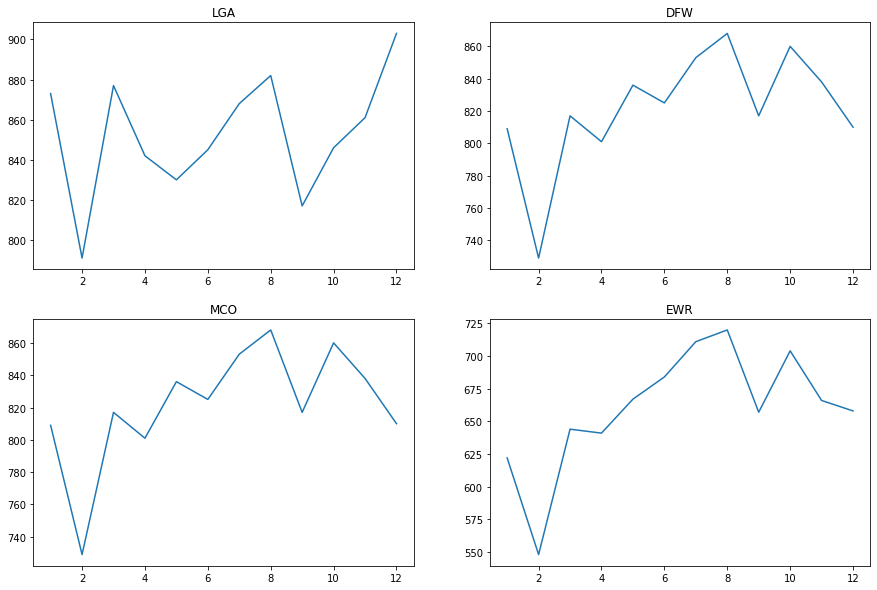

In [36]:
fig, ax = plot.subplots(2, 2, figsize = (15,10))                      # ax has an array (2,2)
                                                                      # the figure will be 15 inch x 11 inch

ax[0][0].plot(dfATL_LGA2007['Month'], dfATL_LGA2007['airport'])       # Top Left
ax[0][0].title.set_text('LGA')

ax[0][1].plot(dfATL_DFW2007['Month'], dfATL_DFW2007['airport'])       # Top Right
ax[0][1].title.set_text('DFW')

ax[1][0].plot(dfATL_MCO2007['Month'], dfATL_DFW2007['airport'])       # Bottom Left
ax[1][0].title.set_text('MCO')

ax[1][1].plot(dfATL_EWR2007['Month'], dfATL_EWR2007['airport'])       # Bottom Right
ax[1][1].title.set_text('EWR')